In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/Users/bahlow/meter_Hw4'

In [2]:
from src.data_preprocess import DataPreprocessing

In [3]:
# preprocessor = DataPreprocessing()

# data = preprocessor.load_data("data/Meter_A.txt")

## Data preprocessing

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.model_builder import ModelBuilder

In [5]:
# Load dataset using the correct method
# data = model_builder.load_data("data/Meter_A.txt")  
preprocessor = DataPreprocessing()

data = preprocessor.load_data("data/Meter_A.txt")

         0         1         2         3          4          5         6   \
0  0.841499  1.009367  0.993816  8.469805  10.278727  10.037759  8.501365   
1  0.842250  1.006584  0.996605  7.531891   9.139924   8.951618  7.612213   
2  0.840723  1.011647  0.998152  6.641699   7.975464   7.857692  6.593117   
3  0.841119  1.017807  0.996812  5.687524   6.824334   6.689885  5.615428   
4  0.840358  1.016534  0.996221  5.660385   6.829560   6.675628  5.623977   

         7          8          9   ...         27         28         29  \
0  8.581726  10.247763  10.058822  ...  32.451173  34.568685  33.082683   
1  7.623325   9.106345   8.945142  ...  32.428385  34.441732  33.081055   
2  6.681572   7.964596   7.814698  ...  32.428385  34.275715  33.113605   
3  5.763315   6.801051   6.686639  ...  32.485350  34.080403  33.170573   
4  5.736818   6.813453   6.672377  ...  32.503255  34.122720  33.164062   

          30         31         32         33         34         35  36  
0  36.722005

In [6]:
train_validation, test = train_test_split(data, test_size = 0.2, random_state=12)

train, validation = train_test_split(train_validation, test_size = 0.2, random_state=99)

In [7]:
# Initialize ModelBuilder (inherits from DataPreprocessing)
model_builder = ModelBuilder()


In [8]:
# Apply feature scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[:, :-1])  # Scale training features
validation_scaled = scaler.transform(validation[:, :-1])  # Scale validation features

Model Training Complete
Model Accuracy: 0.9286
Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.88      0.93         8

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



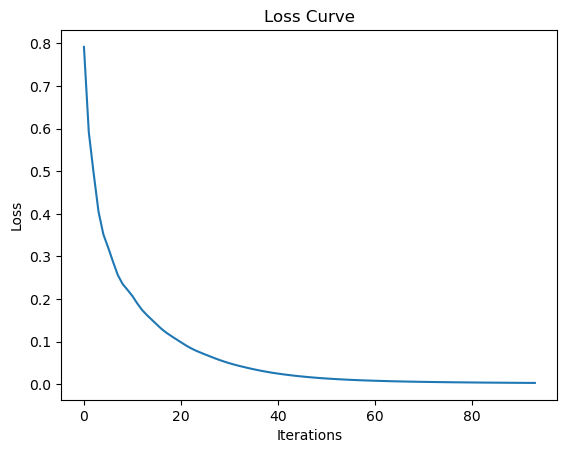

In [9]:
# Train and evaluate ANN Model using ModelBuilder's method
Ann_model = model_builder.ann_model(
    X_train=train_scaled, 
    X_test=validation_scaled, 
    y_train=train[:, -1], 
    y_test=validation[:, -1]
)